In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear
import common_grid_search_analysis
import SVMs.common_SVM as common_SVM
import TrainingCurves
from sklearn.model_selection import ShuffleSplit

from sklearn import svm

In [2]:
PLOT_PREFIX = "Figures/NOISY_NONLINEAR_SVM_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_SVM"

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_noisy_nonlinear()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")

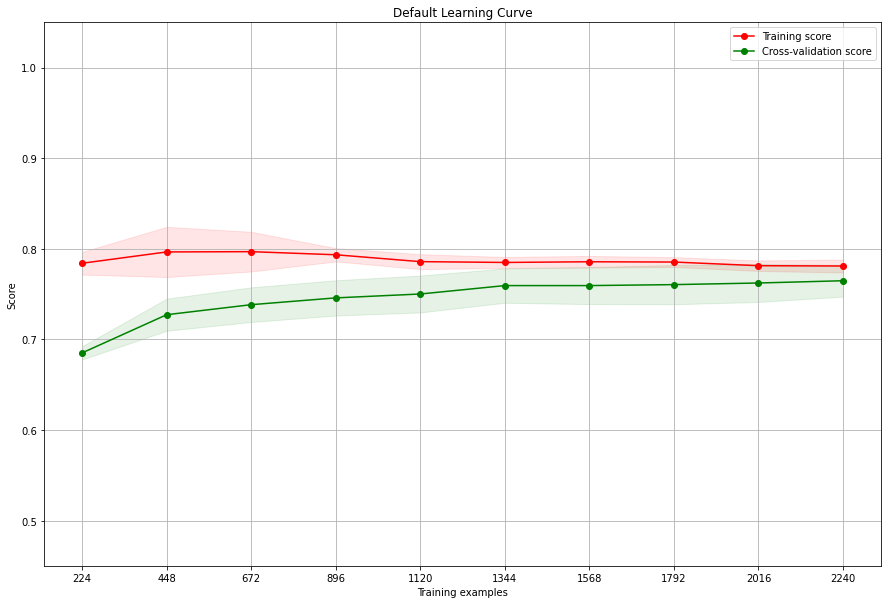

In [5]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [6]:
C = [i for i in range(1, 100, 2)]
gamma = [i for i in range(1, 150, 2)]
kernel = ["linear", "rbf", "poly"]
degree = [3, 4, 5, 6]

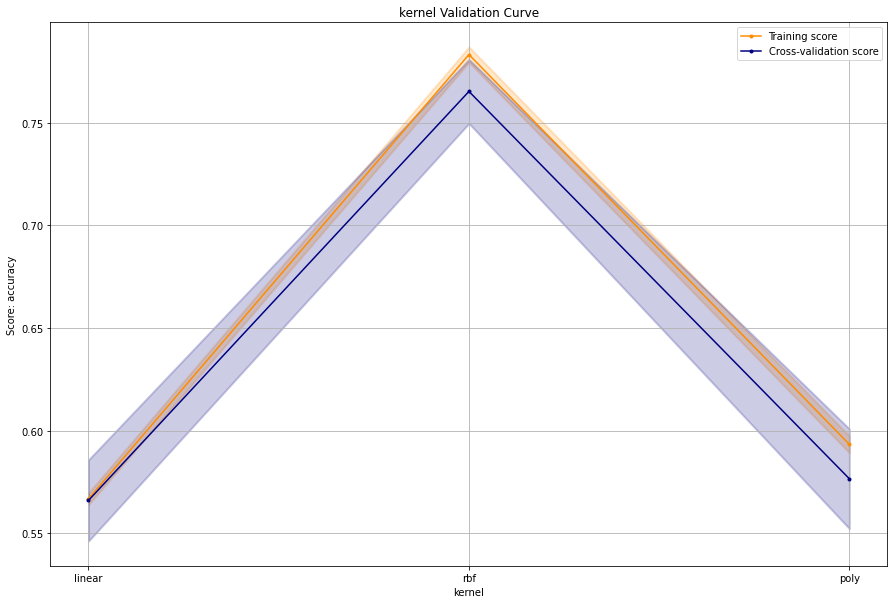

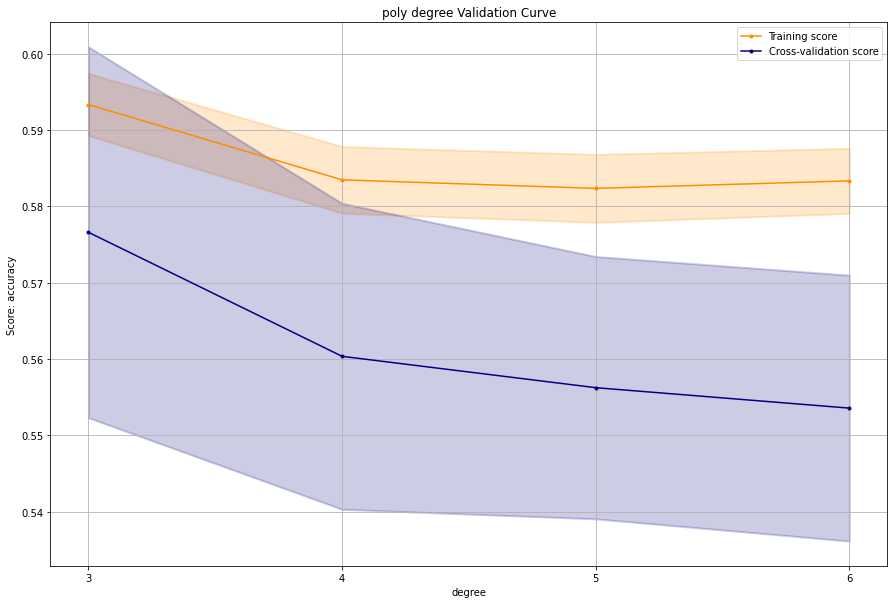

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "kernel", kernel, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "kernel", kernel, title="kernel Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(kernel='poly'), X_train, y_train, "degree", degree, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "degree", degree, title="poly degree Validation Curve", scoring="accuracy", tick_spacing=1)

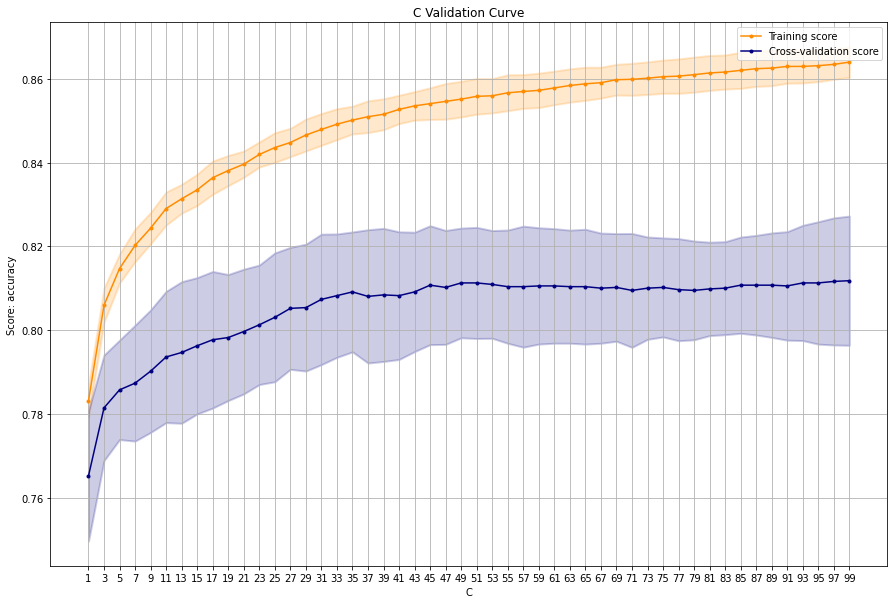

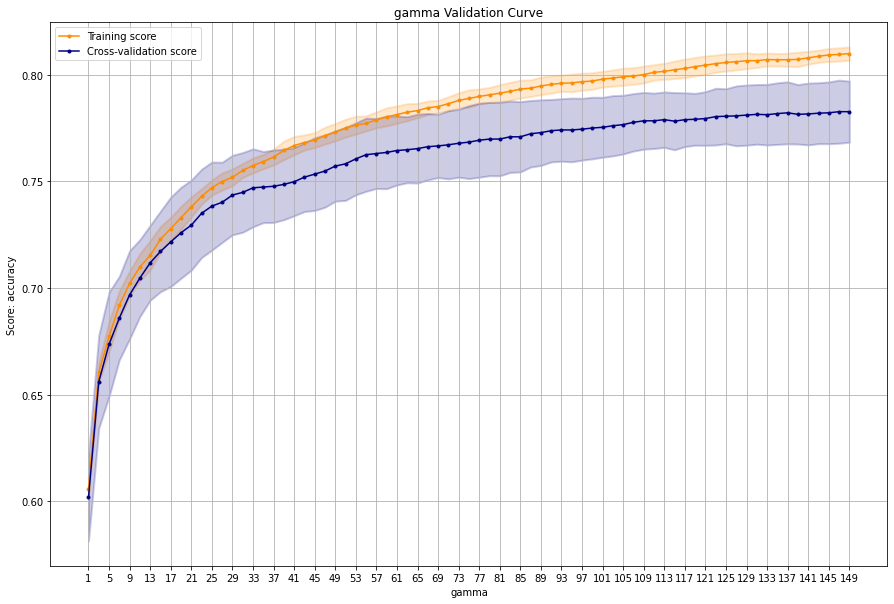

In [8]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "C", C, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "C", C, title="C Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(svm.SVC(), X_train, y_train, "gamma", gamma, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "gamma", gamma, title="gamma Validation Curve", scoring="accuracy", tick_spacing=2)

In [9]:
C = [i for i in range(1, 50, 1)]
gamma = [i for i in range(1, 130, 1)]
kernel = ["linear", "rbf", "poly"]

parameters = {'kernel': kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train,scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/NOISY_NONLINEAR_SVM_kernel_linear-poly_C_1-49_gamma_1-129.pickle
Fitting 5 folds for each of 18963 candidates, totalling 94815 fits
Saved  Analysis_Data/NOISY_NONLINEAR_SVM_kernel_linear-poly_C_1-49_gamma_1-129.pickle


Plot saved as:  Figures/NOISY_NONLINEAR_SVM_TEST_GS_ModelComplexity_C_gamma_kernel.png


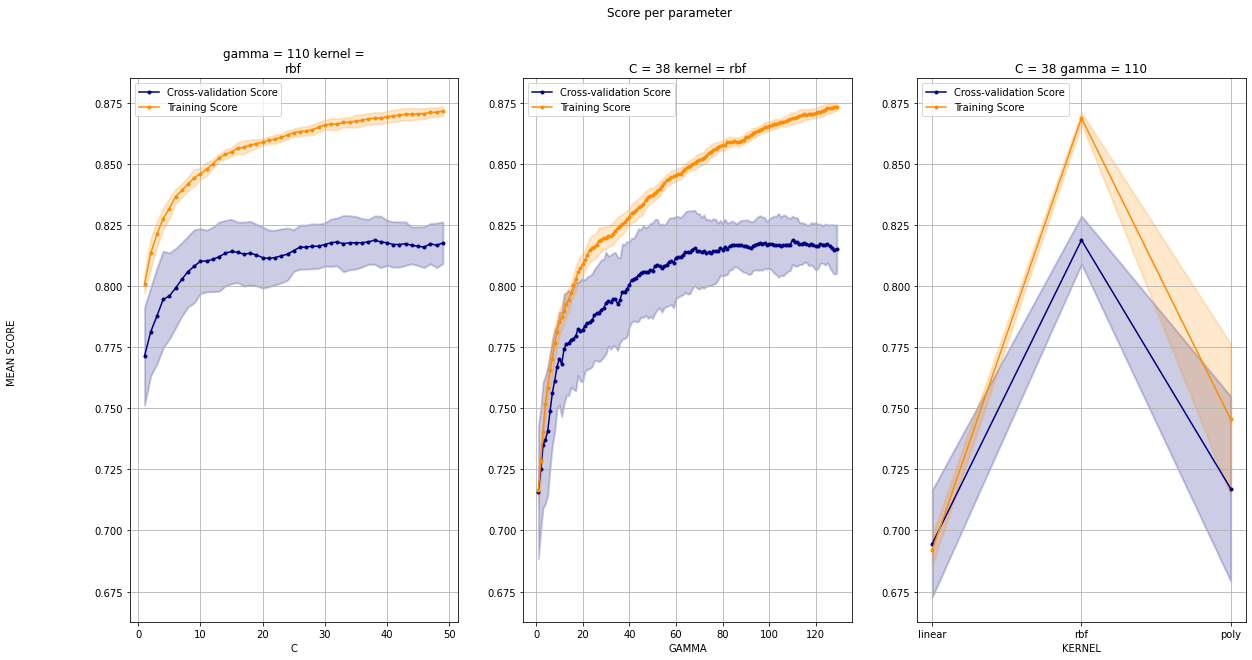

In [13]:
unused_params_values = {'gamma': 1, 'C': 1}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/NOISY_NONLINEAR_SVM_TEST_GS_ModelComplexity_C_gamma_kernel.png


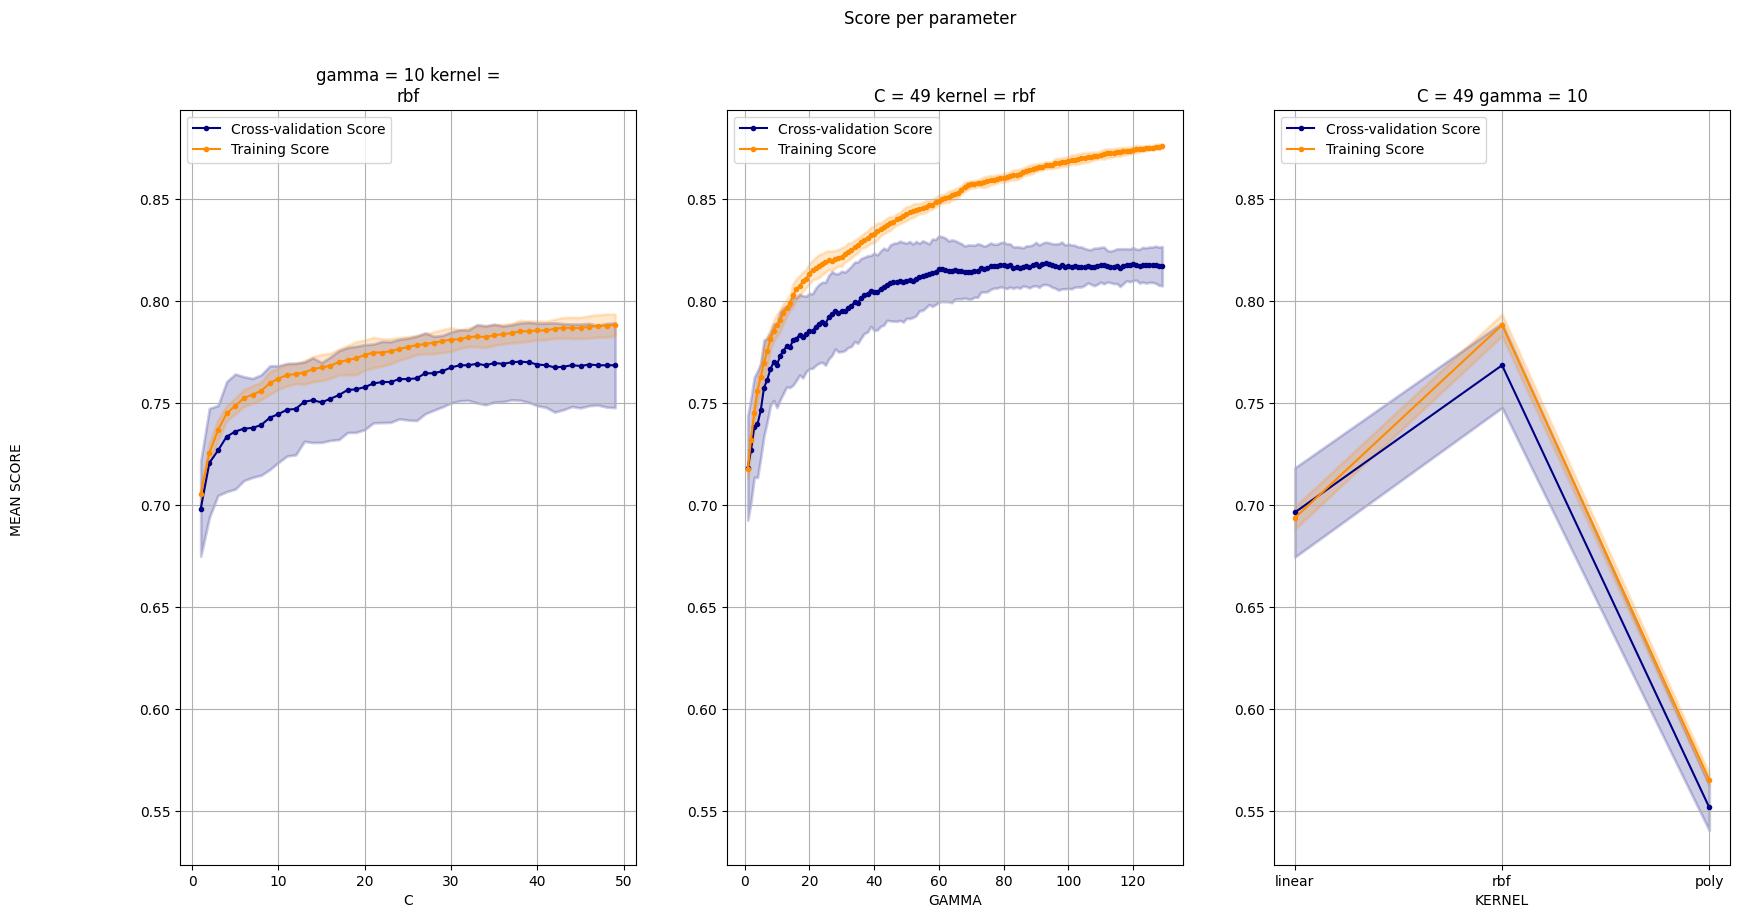

In [21]:
unused_params_values = {'gamma': 10, 'C': 49}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/NOISY_NONLINEAR_SVM_TEST_GS_Times_C_gamma_kernel.png


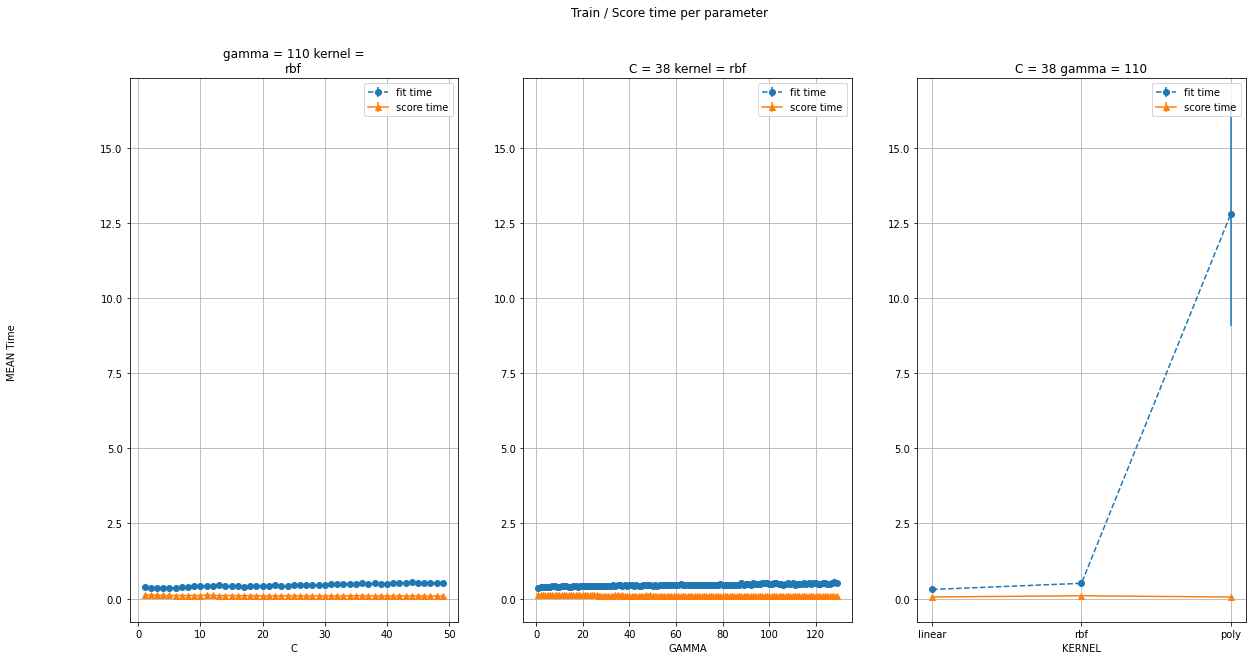

In [14]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/NOISY_NONLINEAR_SVM_TEST_GS_ModelComplexity_C_gamma_kernel.png


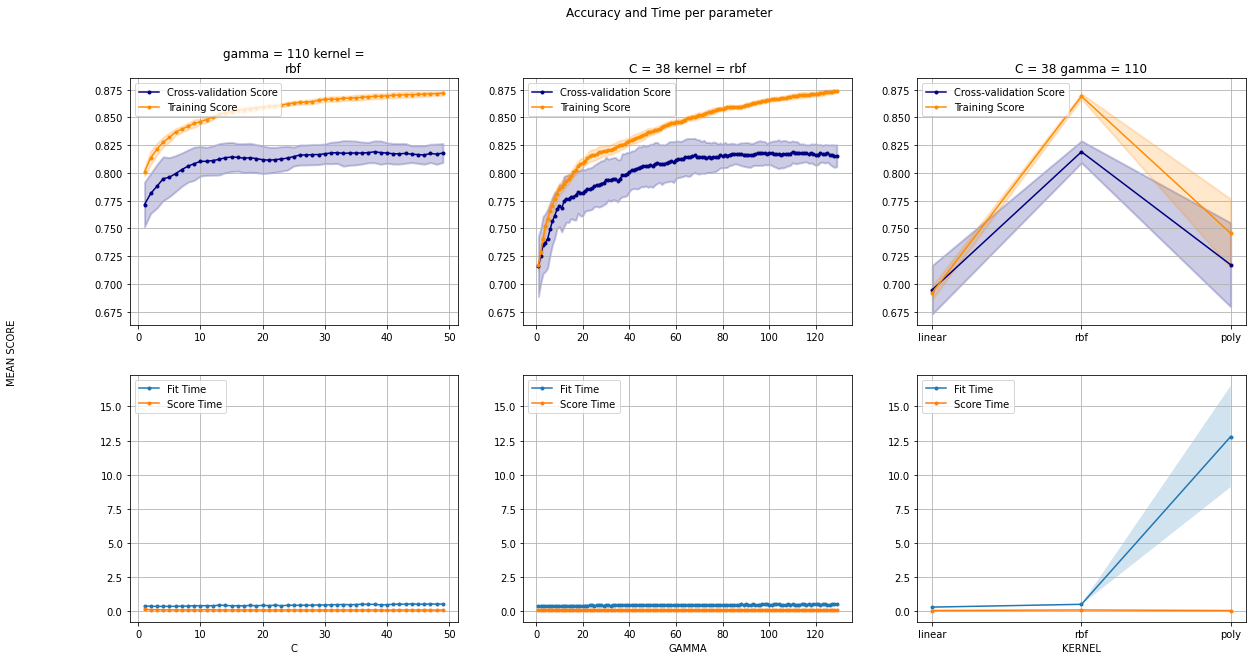

In [12]:
common_grid_search_analysis.plot_grid_search_model_complexity_and_training(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/NOISY_NONLINEAR_SVM_TEST_GridScore_C_gamma_3.png


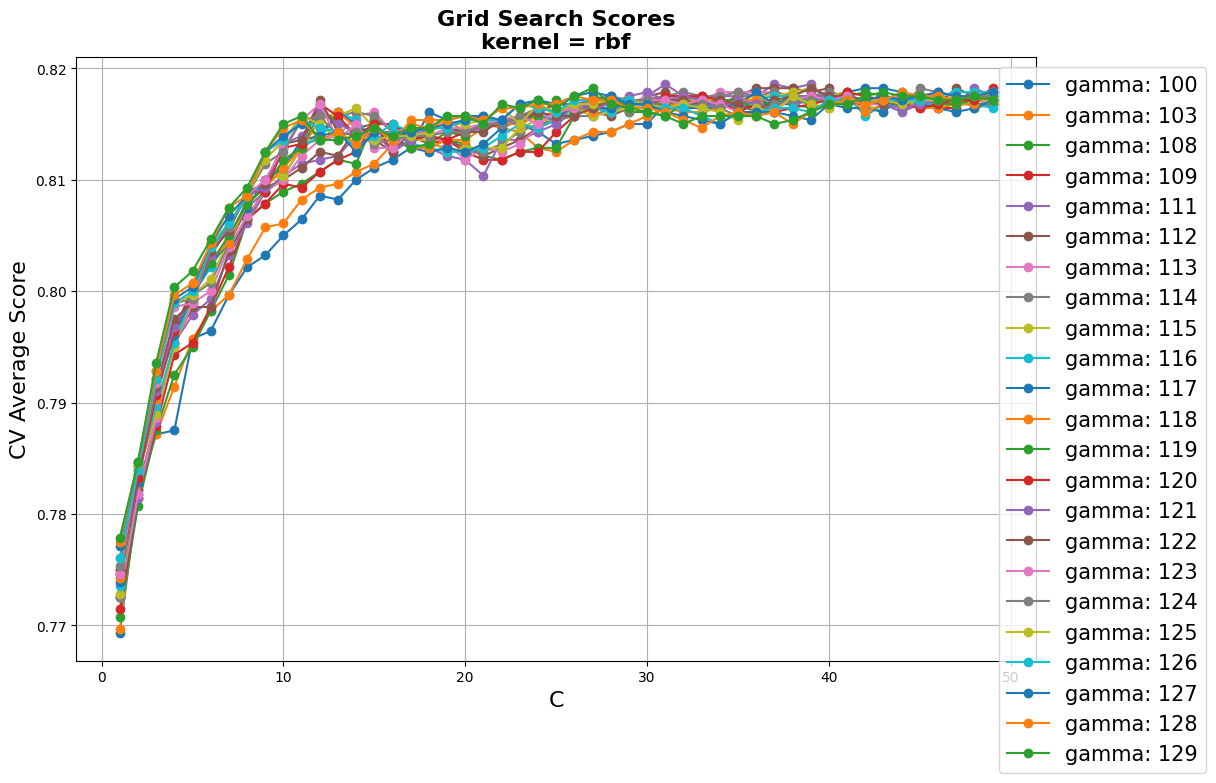

In [18]:
mean_score_limit = 0.815
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

In [22]:
params = {'C': 38, 'gamma': 60, 'kernel': 'rbf'}
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(**params), X_train, y_train, "accuracy")

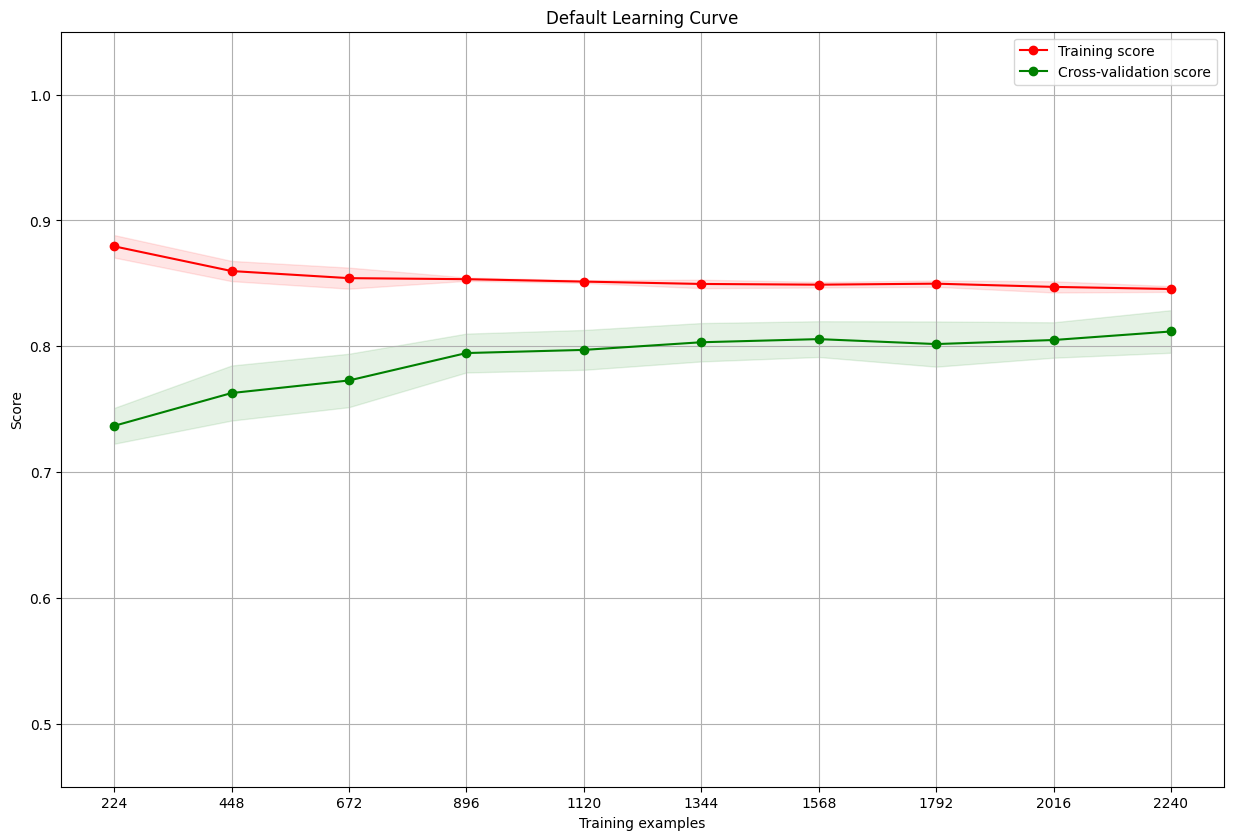

In [23]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)